# All functions required for Agent 4 are same hence did not comment except last

In [ ]:
import numpy as np
import random
import math 
import random
from npy_append_array import NpyAppendArray
from collections import deque

In [2]:
def check_path(env, i, j, vis, path, G, x, y):
    vis[i][j] = 1
    if G == 0 and i == x-1 and j == y-1:
        path = 1
        return path
    else:
        if path != 1 and i!=x-1 and env[i+1][j] == 1 and vis[i+1][j] == 0:
            path = check_path(env, i+1, j, vis, path, G, x, y)
        if path != 1 and j != y-1 and env[i][j+1] == 1 and vis[i][j+1] == 0:
            path = check_path(env, i, j+1, vis, path, G, x, y)
        if path != 1 and i!=0 and env[i-1][j] == 1 and vis[i-1][j] == 0:
            path = check_path(env, i-1, j, vis, path, G, x, y)
        if path != 1 and j != 0 and env[i][j-1] == 1 and vis[i][j-1] == 0:
            path = check_path(env, i, j-1, vis, path, G, x, y)
        return path

In [40]:
n = 0
maze = []
while n<50:
    env = np.zeros((51,51), dtype = int)
    vis = np.zeros((51,51), dtype = int)

    for i in range(51):
        for j in range(51):
             env[i][j] = np.random.choice(2, 1, p = [0.28,0.72])
    env[0,0], env[50,50] = 1, 1
    path = check_path(env, 0, 0, vis, 0, 0, 51, 51)
    if path == 1:
        n += 1
        maze.append(list([env]))

In [41]:
spwL = []

for i in range(50): 
    spwG = np.zeros((51,51), dtype = int) #where ghost can spawn
    path = check_path(maze[i][0], 0, 0, spwG, 0, 1, 51, 51)
    spwL.append(list([spwG]))

In [4]:
def ghost_spw(spwG, n, posG, m):
    for i in range(n):
        randRow = 0
        randCol = 0
        while ((randRow == 0 and randCol == 0) or (randRow == m-1 and randCol == m-1) or spwG[randRow][randCol] == 0):
            randRow = random.randint(0,m-1)
            if randRow == 0:
                randCol = random.randint(1, m-1)
            elif randRow == m-1:
                randCol = random.randint(0, m-2)
            else:
                randCol = random.randint(0, m-1)
        posG.append((randRow, randCol))
    return posG

In [5]:
def move_ghosts(posG, env, size):
    for i in range(len(posG)):
        x = posG[i][0]
        y = posG[i][1]
        movedG = False
        while not(movedG):
            move = np.random.randint(4, size = 1)[0]
            if move == 0 and x != 0:
                    movedG = True
                    if env[x-1][y] == 1:
                        x -= 1
                    else:
                        mv_into_wall = np.random.choice(2, 1, p = [0.5, 0.5])
                        if mv_into_wall == 1:
                            x -= 1
            elif move == 1 and y != size-1:
                    movedG = True
                    if env[x][y+1] == 1:
                        y += 1
                    else:
                        mv_into_wall = np.random.choice(2, 1, p = [0.5, 0.5])
                        if mv_into_wall == 1:
                            y += 1
            elif move == 2 and x != size-1:
                    movedG = True
                    if env[x+1][y] == 1:
                        x += 1
                    else:
                        mv_into_wall = np.random.choice(2, 1, p = [0.5, 0.5])
                        if mv_into_wall == 1:
                            x += 1
            elif move == 3 and y != 0:
                    movedG = True
                    if env[x][y-1] == 1:
                        y -= 1
                    else:
                        mv_into_wall = np.random.choice(2, 1, p = [0.5, 0.5])
                        if mv_into_wall == 1:
                            y -= 1
        posG[i] = tuple([x, y])
    return posG   

In [6]:
def BFS(env, vis, size, start):
    q = [[[start[0], start[1]]]]
    path = list()
    vis[start[0],start[1]] = 1
    #q.append(list([0,0]))
    #print(q)
    while len(q) != 0:
        path = q.pop(0)
        #print("q " , q)
        node = path[-1]
        #print("Path " , path)
        i = node[0]
        j = node[1]
        if i == size-1 and j == size-1:
            return path
        if i!= size-1 and env[i+1][j] == 1 and vis[i+1][j] == 0:
            new_path = list(path)
            #print("new_path1 " , new_path)
            new_path.append([i+1,j])
            #print("new_path2 " , new_path)
            #print("path " , path)
            q.append(new_path)
            #print("q" , q)
            vis[i+1][j] = 1
        if j != size-1 and env[i][j+1] == 1 and vis[i][j+1] == 0:
            new_path = list(path)
            #print("new_path1 " , new_path)
            new_path.append([i,j+1])
            #print("new_path2 " , new_path)
            q.append(new_path)
            vis[i][j+1] = 1
        if i != 0 and env[i-1][j] == 1 and vis[i-1][j] == 0:
            new_path = path
            new_path.append([i-1,j])
            q.append(new_path)
            vis[i-1][j] = 1
        if j != 0 and env[i][j-1] == 1 and vis[i][j-1] == 0:
            new_path = path
            new_path.append([i,j-1])
            q.append(new_path)
            vis[i][j-1] = 1

In [7]:
def BFS_w_ghosts(env, posG, size, currA):
    env_copy  = env.copy()
    vis = np.zeros((size, size), dtype = int)
    for i in posG:
        env[i[0]][i[1]] = 1
    path = BFS(env_copy, vis, 51, currA)
    return path

In [8]:
def move_away(envC, posG, currA):
    min = 1000
    for i in posG:
        dis = math.sqrt((currA[1]-i[1])*(currA[1]-i[1])+(currA[0]-i[0])*(currA[0]-i[0]))
        if dis < min:
            min = dis
            minG = i
    if (minG[0] - currA[0]) == 0:
        slope = 1
    else:
        slope = (minG[1] - currA[1])/(minG[0] - currA[0])
    if slope == 1 and minG[1] > 0 and currA[0] < len(envC)-1:
        return (currA[0]+1, currA[1]) 
    elif minG[1] < 0 and currA[0] > 0:
        return (currA[0]-1, currA[1])
    elif slope == 0 and minG[0] > 0 and currA[1] > 0:
        return (currA[0], currA[1]-1)
    elif minG[0] < 0 and currA[1] < 0 and currA[1] < len(envC)-1:
        return (currA[0], currA[1]+1)
    if slope < 1 and slope > -1 and currA[1] > 0 and env[currA[0],currA[1]-1] == 1:
        return (currA[0], currA[1]-1)
    if slope < 1 and slope < -1 and currA[0] > 0 and env[currA[0]-1,currA[1]] == 1:
        return (currA[0]-1, currA[1])
    if slope > 1 and slope < -1 and currA[1] < len(envC)-1 and env[currA[0],currA[1]+1] == 1:
        return (currA[0], currA[1]+1)
    if slope > 1 and slope > -1 and currA[0] < len(envC)-1 and env[currA[0]+1,currA[1]] == 1:
        return (currA[0]+1, currA[1])
    return currA

In [ ]:
succGA2 = []
for l in range(200):
    success = 0
    print(l)
    for k in range(50):
        currA = [0,0]
        vis = np.zeros(shape=(51, 51), dtype = int)
        j=0
        while j<10:
            posG = []
            posG = ghost_spw(spwL[k][0], l, posG, 51)
            path = BFS_w_ghosts(maze[k][0], posG, 51, currA)
            currA = path[0]
            m=True
            i=0
            while currA != [50, 50]:
                #print(path, i)
                currA = path[i+1]
                if tuple(path[i+1]) in posG:
                    i=-1
                    path = BFS_w_ghosts(maze[k][0], posG, 51, currA)
                if path == None:
                    i=-1
                    currA = move_away(maze[k][0], posG, currA)
                    path = BFS_w_ghosts(maze[k][0], posG, 51, currA)
                #old_posG = posG.copy()
                posG = move_ghosts(posG, maze[k][0], 51)
                if tuple(currA) in posG:
                    m = False
                    break
                i+=1

            if m == True:
                success += 1
            j+=1
    succGA2.append(success/5)

In [9]:
from queue import PriorityQueue

In [30]:
def astar(env, currA, size, posG):
    gscore = {}
    fscore = {}
    childC = None
    for i in range(size):
        for j in range(size):
            gscore[(i,j)] = float('inf')
            fscore[(i,j)] = float('inf')
    #print(gscore, fscore)      
    gscore[(currA[0], currA[1])] = 0
    fscore[(currA[0], currA[1])] = hscore(currA, [size-1, size-1], posG)    
    pq = PriorityQueue()
    pq.put((hscore(currA, (size-1,size-1), posG), hscore(currA, (size-1,size-1), posG), currA))
    pathA = {}
    while not pq.empty():
        currC = tuple(pq.get()[2])
        if currC == (size-1, size-1):
            break
        for i in range(4):
            if i == 0 and currC[1] < size-1 and env[currC[0],currC[1]+1] == 1:
                childC = tuple([currC[0],currC[1]+1])
                tempgscore = gscore[currC]+1
                tempfscore = tempgscore + hscore(childC, (size-1, size-1), posG)
            
                if tempfscore < fscore[childC]:
                    gscore[childC] = tempgscore
                    fscore[childC] = tempfscore
                    pq.put((tempfscore, hscore(childC,(size-1, size-1), posG), childC))
                    pathA[childC] = currC
            if i == 1 and  currC[0] < size-1 and env[currC[0]+1,currC[1]] == 1:
                childC = (currC[0]+1,currC[1])
                tempgscore = gscore[currC]+1
                tempfscore = tempgscore + hscore(childC, (size-1, size-1), posG)
            
                if tempfscore < fscore[childC]:
                    gscore[childC] = tempgscore
                    fscore[childC] = tempfscore
                    pq.put((tempfscore, hscore(childC,(size-1, size-1), posG), childC))
                    pathA[childC] = currC
            if i == 2 and currC[1] > 0 and env[currC[0],currC[1]-1] == 1:
                childC = (currC[0],currC[1]-1)
                tempgscore = gscore[currC]+1
                tempfscore = tempgscore + hscore(childC, (size-1, size-1), posG)
            
                if tempfscore < fscore[childC]:
                    gscore[childC] = tempgscore
                    fscore[childC] = tempfscore
                    pq.put((tempfscore, hscore(childC,(size-1, size-1), posG), childC))
                    pathA[childC] = currC
            if i == 3  and currC[0] > 0 and env[currC[0]-1,currC[1]] == 1:
                childC = (currC[0]-1,currC[1])
                tempgscore = gscore[currC]+1
                tempfscore = tempgscore + hscore(childC, (size-1, size-1), posG)
            
                if tempfscore < fscore[childC]:
                    gscore[childC] = tempgscore
                    fscore[childC] = tempfscore
                    pq.put((tempfscore, hscore(childC,(size-1, size-1), posG), childC))
                    pathA[childC] = currC
            

    pathF = {}
    #print("currA", currA)
    cell = (size-1, size-1)
    #print("pathA", pathA)
    if pathA.get(cell) == None:
        return None
    while cell != tuple(currA):
        pathF[pathA[cell]] = cell
        cell = pathA[cell]
    #print("pathF", pathF)
    return pathF


In [34]:
def astar_w_ghosts(env, currA, posG):
    env_copy  = env.copy()
    for i in posG:
        if currA[0] + 3 > i[0] and currA[0] - 3 < i[0] and currA[1] + 3 > i[1] and currA[1] - 3 < i[1]:
            env_copy[i[0]][i[1]] = 0
    path = astar(env_copy, currA, len(env), posG)
    return path

# Agent 4 using A star

In [95]:
def agent4_game_on(env, posG):
    currC = (0,0)
    size = len(env)
    success = 0
    j=0
    childC = None
    env_copy = env.copy()
    for i in posG:
        env_copy[i[0]][i[1]] = 0
    m = True
    while j<2:
        m = True
        while currC != (size-1, size-1):
            #print(currC)
            dis = 10000
            minD = 10000
            maxS = 0
            srate = 0
            posG_copy = posG.copy()
            for i in range(5):
                if i == 0 and currC[1] < size-1 and env[currC[0],currC[1]+1] == 1:
                    nextC = (currC[0],currC[1]+1)
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                if i == 1 and  currC[0] < size-1 and env[currC[0]+1,currC[1]] == 1:
                    nextC = (currC[0]+1,currC[1])
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                if i == 2 and currC[1] > 0 and env[currC[0],currC[1]-1] == 1:
                    nextC = (currC[0],currC[1]-1)
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                if i == 3  and currC[0] > 0 and env[currC[0]-1,currC[1]] == 1:
                    nextC = (currC[0]-1,currC[1])
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                if i == 4:
                    nextC = (currC)
                    srate, dis = agent2WAstar(env, nextC, posG_copy)
                #print(i, srate, max)
                if srate > maxS:
                    maxS = srate
                    childC = nextC
                if dis < minD and dis != 0 and srate == maxS:
                    minD = dis
                    childC = nextC
            if childC != None:
                currC = childC
            elif srate == 0:
                currC = move_away(env_copy, posG, currC)
                
            posG = move_ghosts(posG, env, 51)
            
            if currC in posG:
                m = False
                break
        if m==True:
            success += 1 
        j += 1
    return success/2

In [96]:
def agent2WAstar(env, currA, posG):
    path = {}
    size = len(env)
    if currA == (size-1, size-1):
        return 1 ,0.01
    path = astar_w_ghosts(env, currA, posG)
    #if path == None:
        #return 0 #, 0
    #print("agent2WAstar", path)
    env_copy = env.copy()
    success = 0
    dis = 0
    j=0
    while j<5:
        m=True
        while currA != (size-1, size-1):
            if path != None:
                currA = path.get(currA)
            else:
                currA = move_away(env_copy, posG, currA)
                path = astar_w_ghosts(env, currA, posG)
                #dis = 0
                #m = False
                #break
            posG = move_ghosts(posG, env, size)
            if currA in posG:
                dis = 0
                m = False
                break
            if path != None and path.get(currA) in posG:
                path = astar_w_ghosts(env, currA, posG)
            if path == None:
                currA = move_away(env_copy, posG, currA)
                path = astar_w_ghosts(env, currA, posG)
            #old_posG = posG.copy()
            dis += 1
        if m == True:
            success += 1
        j+=1
    return success/5 , dis/5

In [ ]:
def agent2BFS(env, currA, posG):
    path = {}
    size = len(env)
    if currA == (size-1, size-1):
        return 1
    path = BFS_w_ghosts(env, posG, 51, currA)
    if path == None:
        return 0 #, 0
    #print("agent2BFS1", path)
    env_copy = env.copy()
    for i in posG:
        env_copy[i[0]][i[1]] = 0
    success = 0
    dis = 0
    j=0
    while j<5:
        posG = []
        posG = ghost_spw(spwL[k][0], l, posG, 51)
        path = BFS_w_ghosts(env, posG, 51, currA)
        while path == None:
            currA = move_away(env, posG, currA)
            path = BFS_w_ghosts(env, posG, 51, currA)
        currA = path[0]
        m=True
        i=0
        while currA != [size-1, size-1]:
            #print("agent2BFS2", path, i)
            currA = path[i+1]
            if tuple(path[i+1]) in posG:
                i=-1
                path = BFS_w_ghosts(env, posG, 51, currA)
            if path == None:
                i=-1
                currA = move_away(env, posG, currA)
                path = BFS_w_ghosts(env, posG, 51, currA)
            #old_posG = posG.copy()
            posG = move_ghosts(posG, env, 51)
            if tuple(currA) in posG:
                m = False
                break
            i+=1
        if m == True:
            success += 1
        j+=1
    return success/5 

# Agent  4 runs

In [98]:
for l in range(20,50):
    success = 0
    print(l)
    for k in range(10):
        posG = []
        posG = ghost_spw(spwL[k][0], l, posG, 51)
        success += agent4_game_on(maze[k][0], posG)
    succGA41D.append(success/10)

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

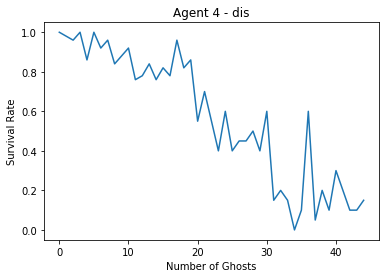

In [99]:
#import matplotlib.pyplot as plt

x = [i for i in range(45)]
#for i in range(20):
    #succGA41D[i] = succGA41D[i]/10
plt.plot(x, succGA41D)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 4 - 1 * dis')
plt.show

In [16]:
def distance(cell1, posG):
    min = 3000
    for i in posG:
        dis = math.sqrt((cell1[1]-i[1])*(cell1[1]-i[1])+(cell1[0]-i[0])*(cell1[0]-i[0]))
        if dis < min:
            min = dis
    return min

In [43]:
def hscore(cell1, cell2, posG):
    dis = distance(cell1, posG)
    manend = abs(cell1[0]-cell2[0]) + abs(cell1[1]-cell2[1])
    return manend - 0.5 * dis

In [42]:
succGA4 = []
for l in range(20):
    success = 0
    print(l)
    for k in range(50):
        posG = []
        posG = ghost_spw(spwL[k][0], l, posG, 51)
        success += agent4_game_on(maze[k][0], posG)
    succGA4.append(success/5)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
#import matplotlib.pyplot as plt

x = [i for i in range(20)]
for i in range(20):
    succGA4[i] = succGA4[i]/10
plt.plot(x, succGA4)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 4 - dis')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

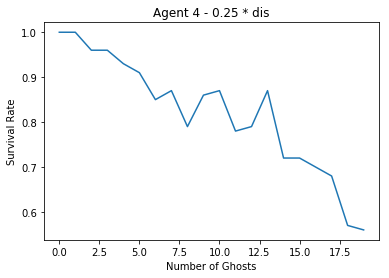

In [51]:
import matplotlib.pyplot as plt

x = [i for i in range(20)]
for i in range(20):
    succGA4[i] = succGA4[i]/10
plt.plot(x, succGA4)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 4 - 0.25 * dis')
plt.show

In [44]:
succGA4halfD = []
for l in range(20):
    success = 0
    print(l)
    for k in range(50):
        posG = []
        posG = ghost_spw(spwL[k][0], l, posG, 51)
        success += agent4_game_on(maze[k][0], posG)
    succGA4halfD.append(success/5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


<function matplotlib.pyplot.show(*args, **kw)>

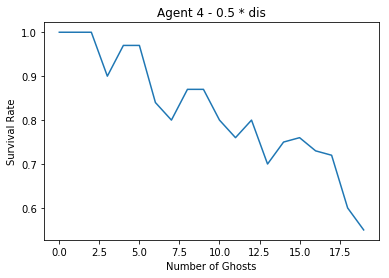

In [52]:
#import matplotlib.pyplot as plt

x = [i for i in range(20)]
for i in range(20):
    succGA4halfD[i] = succGA4halfD[i]/10
plt.plot(x, succGA4halfD)
plt.xlabel('Number of Ghosts')
plt.ylabel('Survival Rate')
plt.title('Agent 4 - 0.5 * dis')
plt.show

# Different heuristic includes distance to nearest ghost

In [53]:
def hscore(cell1, cell2, posG):
    dis = distance(cell1, posG)
    manend = abs(cell1[0]-cell2[0]) + abs(cell1[1]-cell2[1])
    return manend - dis

In [59]:
succGA4B = []
for l in range(1):
    success = 0
    l = 20
    print(l)
    for k in range(1):
        posG = []
        posG = ghost_spw(spwL[k][0], l, posG, 51)
        success += agent4_game_on(maze[k][0], posG)
    succGA4B.append(success/5)

20


AttributeError: 'list' object has no attribute 'get'

In [56]:
succGA4HQD, succGA4halfD

([10.0, 10.0, 9.8, 9.6, 9.4],
 [1.0,
  1.0,
  1.0,
  0.9,
  0.97,
  0.97,
  0.8400000000000001,
  0.8,
  0.8699999999999999,
  0.8699999999999999,
  0.8,
  0.76,
  0.8,
  0.7,
  0.75,
  0.76,
  0.73,
  0.72,
  0.6,
  0.55])